## Observations and Insights 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_combine_df = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID")
# Display the data table for preview
mouse_data_combine_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [12]:
# Checking the number of mice.
mice_count = mouse_data_combine_df ["Mouse ID"].count()
mice_count

1893

In [13]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_data_combine_df[mouse_data_combine_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data = mouse_data_combine_df[mouse_data_combine_df.duplicated(["Mouse ID",])]
all_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_combine_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


In [18]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean_df = clean_df ["Mouse ID"].count()
mice_count_clean_df

249

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = mouse_data_combine_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = mouse_data_combine_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = mouse_data_combine_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdv = mouse_data_combine_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = mouse_data_combine_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": SEM})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

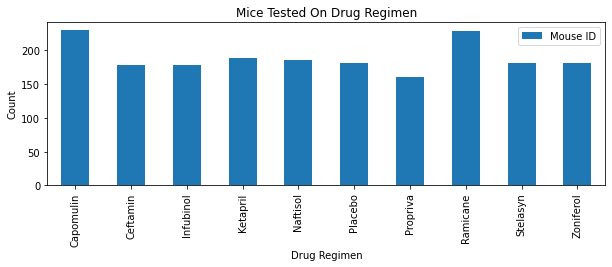

In [43]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_mice_tested = pd.DataFrame(mouse_data_combine_df.groupby(["Drug Regimen"]).count()).reset_index()
total_mice_df = total_mice_tested[["Drug Regimen", "Mouse ID"]]
total_mice_df = total_mice_df.set_index("Drug Regimen")
total_mice_df.plot(kind='bar', figsize=(10,3))

plt.title("Mice Tested On Drug Regimen")
plt.ylabel("Count")
plt.show()

In [59]:
plt.clf()
plt.cla()
plt.close()

In [28]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
total_mice_tested = summary_df.index.tolist()
total_mice_tested


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [180]:
#Creasting List for Plot
total_mice = (mouse_data_combine_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
total_mice

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [181]:
x_axis = np.arange(len(total_mice))

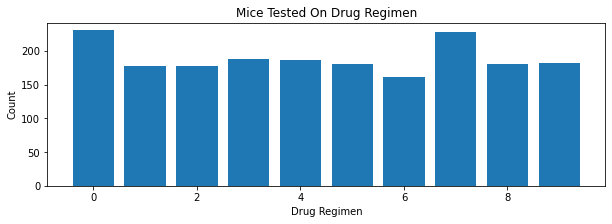

In [182]:
#Creating Plot
#x_axis = total_mice
plt.figure(figsize=(10,3))
plt.bar(x_axis, total_mice)

plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.title("Mice Tested On Drug Regimen")
plt.show()


In [177]:
plt.clf()
plt.cla()
plt.close()

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Representing Df in Table
gen_dist_df = pd.DataFrame(mouse_data_combine_df.groupby(["Sex"]).count()).reset_index()
gen_dist_df.head()

,Sex,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Age_months,Weight (g)
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [57]:
#Removing Undesired Variables 
gen_dist_df = gen_dist_df[["Sex", "Mouse ID"]]
gen_dist_df

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0.5, 1.0, 'Distribution of Male to Female Mice')

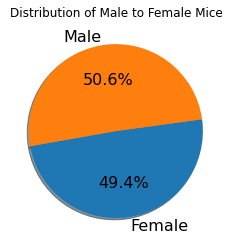

In [69]:
#Creating Pie Chart
#plt.figure(figuresize=(10,3))
gen_dist_df.plot(kind="pie", y="Mouse ID", autopct="%1.1f%%", startangle=190, shadow=True, labels=gen_dist_df["Sex"], legend=False, fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.title("Distribution of Male to Female Mice")

In [ ]:
plt.clf()
plt.cla()
plt.close()

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Creating List
gen_dist = (mouse_data_combine_df.groupby(["Sex"])["Age_months"].count()).tolist()
gen_dist


[935, 958]

(-1.1307662192284451,
 1.1028353072136643,
 -1.1287537989808334,
 1.1050012388050456)

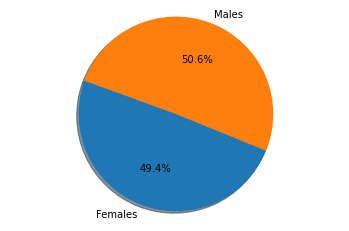

In [76]:
#Creating Chart
plt.pie(gen_dist, labels=["Females", "Males"], autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

In [77]:
plt.clf()
plt.cla()
plt.close()

## Quartiles, Outliers and Boxplots

In [80]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_data_combine_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [81]:
# Start by getting the last (greatest) timepoint for each mouse
sorted_last_df = mouse_data_combine_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_df = sorted_last_df.loc[sorted_last_df["Timepoint"] == 45]
tumor_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.982878,2,Capomulin,Female,9,22
1,1710,b742,45,38.939633,0,Capomulin,Male,7,21
2,1834,g288,45,37.074024,1,Capomulin,Male,3,19
3,1824,g316,45,40.159220,2,Capomulin,Female,22,22
4,1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
#Capomulin
cap_df = tumor_df[tumor_df["Drug Regimen"].isin(["Capomulin"])]
cap_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,9,b128,45,38.982878,2,Capomulin,Female,9,22
1,1710,b742,45,38.939633,0,Capomulin,Male,7,21
2,1834,g288,45,37.074024,1,Capomulin,Male,3,19
3,1824,g316,45,40.159220,2,Capomulin,Female,22,22
4,1867,i557,45,47.685963,1,Capomulin,Female,1,24


In [104]:
# Create empty list to fill with tumor vol data (for plotting)
cap_df = treat_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_df = cap_df["Tumor Volume (mm3)"]
cap_df

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [214]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    #Capomulin
quartile_range = tumor_vol.quantile([0.25, 0.5, 0.75])
lower_q = quartile_range[0.25]
upper_q = quartile_range[0.75]
IQR = upper_q - lower_q

print(f"Lower quartile: {lower_q}")
print(f"Upper quartile: {upper_q}")
print(f"Inner quartile range: {IQR}")
print(f"Median Temp: {quartile_range[0.5]}")

# Determine outliers using upper and lower bounds
lower_bounds = lower_q - (1.5*IQR)
upper_bounds = upper_q + (1.5*IQR)
print(f"Lower Bound Outliers: {lower_bounds}")
print(f"Upper Bound Outliers: {upper_bounds}")

Lower quartile: 32.37735684
Upper quartile: 40.1592203
Inner quartile range: 7.781863460000004
Median Temp: 37.31184577
Lower Bound Outliers: 20.70456164999999
Upper Bound Outliers: 51.83201549


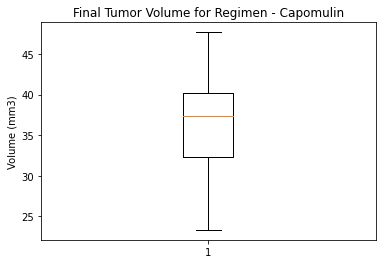

In [209]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axis = plt.subplots()
axis.set_title("Final Tumor Volume for Regimen - Capomulin")
axis.set_ylabel("Volume (mm3)")
axis.boxplot(tumor_vol)
plt.show()

In [210]:
# Put treatments into a list for for loop (and later for plot labels)
#Ramicane
ram_df = tumor_df[tumor_df["Drug Regimen"].isin(["Ramicane"])]
ram_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,470,a411,45,38.407618,1,Ramicane,Male,3,22
1,480,a444,45,43.047543,0,Ramicane,Female,10,25
2,584,a520,45,38.810366,1,Ramicane,Male,13,21
3,554,a644,45,32.978522,1,Ramicane,Female,7,17
4,524,c758,45,33.397653,1,Ramicane,Male,9,17


In [211]:
# Create empty list to fill with tumor vol data (for plotting)
#Ramicane
ram_df = treat_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_df = ram_df["Tumor Volume (mm3)"]
ram_df

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [215]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    #Ramicane
quartile_range = ram_df.quantile([0.25, 0.5, 0.75])
lower_q = quartile_range[0.25]
upper_q = quartile_range[0.75]
IQR = upper_q - lower_q

print(f"Lower quartile: {lower_q}")
print(f"Upper quartile: {upper_q}")
print(f"Inner quartile range: {IQR}")
print(f"Median Temp: {quartile_range[0.5]}")

# Determine outliers using upper and lower bounds
lower_bounds = lower_q - (1.5*IQR)
upper_bounds = upper_q + (1.5*IQR)
print(f"Lower Bound Outliers: {lower_bounds}")
print(f"Upper Bound Outliers: {upper_bounds}")

Lower quartile: 32.37735684
Upper quartile: 40.1592203
Inner quartile range: 7.781863460000004
Median Temp: 37.31184577
Lower Bound Outliers: 20.70456164999999
Upper Bound Outliers: 51.83201549


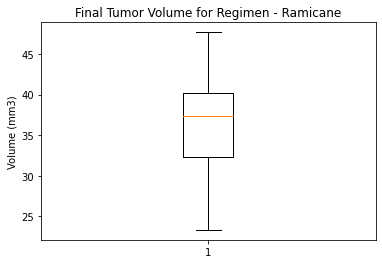

In [216]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axis = plt.subplots()
axis.set_title("Final Tumor Volume for Regimen - Ramicane")
axis.set_ylabel("Volume (mm3)")
axis.boxplot(ram_df)
plt.show()

In [217]:
# Put treatments into a list for for loop (and later for plot labels)
#Infubinol
inf_df = tumor_df[tumor_df["Drug Regimen"].isin(["Infubinol"])]
inf_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,907,a203,45,67.973419,2,Infubinol,Female,20,23
1,289,a251,45,65.525743,1,Infubinol,Female,21,25
2,1423,a685,45,66.083066,3,Infubinol,Male,8,30
3,224,c139,45,72.226731,2,Infubinol,Male,11,28
4,1459,e476,45,62.435404,1,Infubinol,Male,23,26


In [218]:
# Create empty list to fill with tumor vol data (for plotting)
#Infubinol
inf_df = treat_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_df = inf_df["Tumor Volume (mm3)"]
inf_df

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [219]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    #Infubinol
quartile_range = inf_df.quantile([0.25, 0.5, 0.75])
lower_q = quartile_range[0.25]
upper_q = quartile_range[0.75]
IQR = upper_q - lower_q

print(f"Lower quartile: {lower_q}")
print(f"Upper quartile: {upper_q}")
print(f"Inner quartile range: {IQR}")
print(f"Median Temp: {quartile_range[0.5]}")

# Determine outliers using upper and lower bounds
lower_bounds = lower_q - (1.5*IQR)
upper_bounds = upper_q + (1.5*IQR)
print(f"Lower Bound Outliers: {lower_bounds}")
print(f"Upper Bound Outliers: {upper_bounds}")

Lower quartile: 32.37735684
Upper quartile: 40.1592203
Inner quartile range: 7.781863460000004
Median Temp: 37.31184577
Lower Bound Outliers: 20.70456164999999
Upper Bound Outliers: 51.83201549


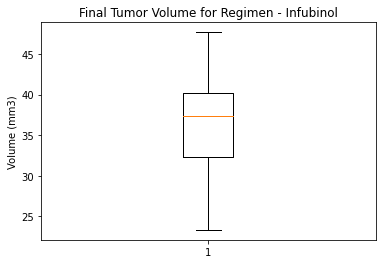

In [226]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axis = plt.subplots()
axis.set_title("Final Tumor Volume for Regimen - Infubinol")
axis.set_ylabel("Volume (mm3)")
axis.boxplot(inf_df)
plt.show()

In [222]:
# Put treatments into a list for for loop (and later for plot labels)
#Ceftamin
cef_df = tumor_df[tumor_df["Drug Regimen"].isin(["Ceftamin"])]
cef_df.head().reset_index()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1487,a275,45,62.999356,3,Ceftamin,Female,20,28
1,1394,j296,45,61.849023,3,Ceftamin,Female,24,30
2,1477,k210,45,68.923185,3,Ceftamin,Male,15,28
3,1354,l471,45,67.748662,1,Ceftamin,Female,7,28
4,1384,l661,45,59.851956,3,Ceftamin,Male,18,26


In [223]:
# Create empty list to fill with tumor vol data (for plotting)
#Ceftamin
cef_df = treat_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_df = cef_df["Tumor Volume (mm3)"]
cef_df

0     23.343598
1     28.430964
2     28.484033
3     31.023923
4     31.896238
5     32.377357
6     33.329098
7     34.455298
8     36.041047
9     37.074024
10    37.311846
11    38.125164
12    38.846876
13    38.939633
14    38.982878
15    40.159220
16    40.658124
17    40.728578
18    41.483008
19    41.581521
20    47.685963
Name: Tumor Volume (mm3), dtype: float64

In [224]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    #Ceftamin
quartile_range = cef_df.quantile([0.25, 0.5, 0.75])
lower_q = quartile_range[0.25]
upper_q = quartile_range[0.75]
IQR = upper_q - lower_q

print(f"Lower quartile: {lower_q}")
print(f"Upper quartile: {upper_q}")
print(f"Inner quartile range: {IQR}")
print(f"Median Temp: {quartile_range[0.5]}")

# Determine outliers using upper and lower bounds
lower_bounds = lower_q - (1.5*IQR)
upper_bounds = upper_q + (1.5*IQR)
print(f"Lower Bound Outliers: {lower_bounds}")
print(f"Upper Bound Outliers: {upper_bounds}")

Lower quartile: 32.37735684
Upper quartile: 40.1592203
Inner quartile range: 7.781863460000004
Median Temp: 37.31184577
Lower Bound Outliers: 20.70456164999999
Upper Bound Outliers: 51.83201549


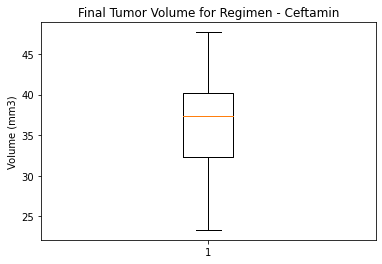

In [225]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axis = plt.subplots()
axis.set_title("Final Tumor Volume for Regimen - Ceftamin")
axis.set_ylabel("Volume (mm3)")
axis.boxplot(inf_df)
plt.show()

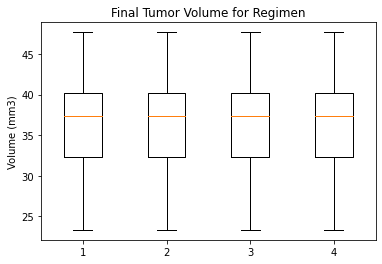

In [236]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_group = [inf_df, cef_df, ram_df, tumor_vol]
fig, axis = plt.subplots()
axis.set_title("Final Tumor Volume for Regimen")
axis.set_ylabel("Volume (mm3)")
axis.boxplot(data_group)
plt.show()


## Line and Scatter Plots

In [220]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = mouse_data_combine_df.loc[mouse_data_combine_df["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22


In [109]:
#One mouse 
capom_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]
capom_mouse

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22
5,5,b128,25,43.262145,1,Capomulin,Female,9,22
6,6,b128,30,40.605335,1,Capomulin,Female,9,22
7,7,b128,35,37.967644,1,Capomulin,Female,9,22
8,8,b128,40,38.379726,2,Capomulin,Female,9,22
9,9,b128,45,38.982878,2,Capomulin,Female,9,22


<AxesSubplot:xlabel='Timepoint'>

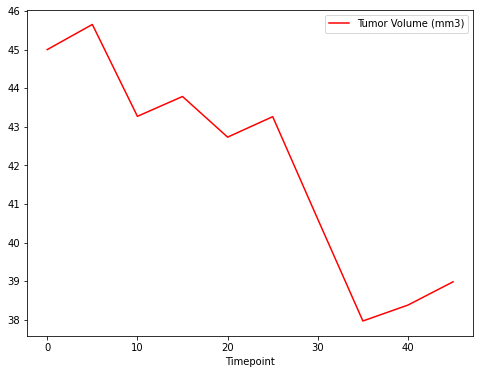

In [118]:
#Cleaning data into two columns
capom_mouse = capom_mouse.loc[:, ["Tumor Volume (mm3)", "Timepoint"]]
#Generate line plot
capom_mouse = capom_mouse.reset_index(drop=True)
capom_mouse.set_index("Timepoint").plot(figsize=(8,6), color="red")

In [120]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.head()

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,b128,20,42.731552,0,Capomulin,Female,9,22


In [199]:
mouse_weight_df = capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
mouse_weight_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,45.000000
1,b128,22,45.651331
2,b128,22,43.270852
3,b128,22,43.784893
4,b128,22,42.731552


In [193]:
#Average tumor volume for mice with Capomulin
avg_capom = pd.DataFrame(mouse_weight_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_capom= avg_capom.rename(columns={"Tumor Volume (mm3)": "Average Volume(mm3)"})
avg_capom.head()

,Mouse ID,Weight (g),Average Volume(mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [ ]:
avg_capom = avg_capom.set_index("Mouse ID")

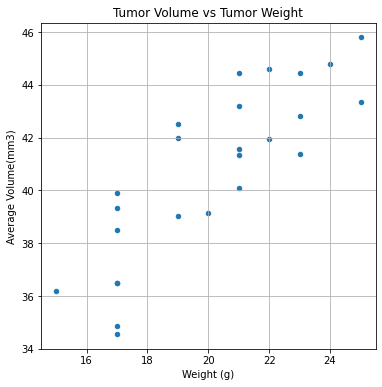

In [202]:
#Generating Scatter Plot
avg_capom.plot(kind="scatter", y="Average Volume(mm3)", x="Weight (g)", grid=True, figsize=(6,6), title="Tumor Volume vs Tumor Weight")
plt.show()

In [ ]:
plt.clf()
plt.cla()
plt.close()

## Correlation and Regression

In [207]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = avg_capom.iloc[:,1]
avg_tumor_vol = avg_capom.iloc[:,2]
correlation_cof = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f"Correlation: {round(correlation_cof[0],2)}")

Correlation: 0.84


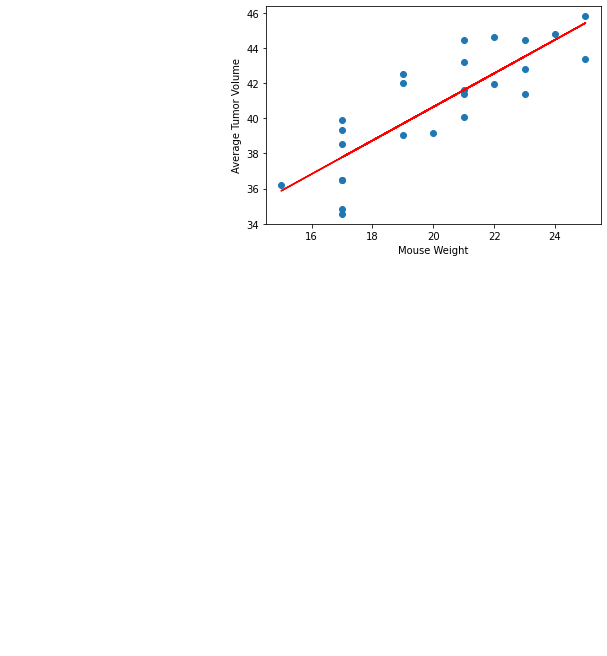

In [208]:
# Linear Regression Model
from scipy.stats import linregress
x_val = avg_capom["Weight (g)"]
y_val = avg_capom["Average Volume(mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regression = x_val * slope + intercept 
line = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regression, "r-")
plt.annotate(line,(6,10),fontsize=15,color='red')
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()

In [171]:
##Observations
#1. Linear regression indicates a positive correlation between mouse weight and tumor volume
#2. Fairly equal distribution of male to female 